<div class="bg-primary text-info"><br><center><h1>RAPPEL - Algorithmes avancés : Les $k$ plus proches voisins</h1></center><br></div>

---
## Introduction

L'algorithme des $k$ plus proches voisins ou **KNN** (**K** **N**earest **N**eighbors) est un algorithme qui, à partir d'un jeu de données existantes et d'une donnée cible, déterminera les $k$ données les plus proches de la cible.  
En intelligence artificielle, plus précisément en apprentissage automatique, la méthode des $k$ plus proches voisins est une méthode d’**apprentissage supervisé**.

## Problématique
On relève sur des objets de différentes **classes** différents **paramètres** qui vont permettre de les distinguer.  
L'objectif est de pouvoir prévoir **à quelle classe appartient un nouvel objet uniquement à l'aide de ses paramètres**.  

Prenons un exemple simple : la classe `chat` et la classe `chien` disposent des paramètres `taille`, `poids`, `couleur`, `fidélité`, etc.  
Nous désirons déterminer si un animal donné est un chat ou un chien en fonction de sa taille et son poids...  

Voici un exemple d'échantillon de données disponibles:

| Nom | Catégorie | Taille | Poids |
|:-----|-----------|--------|-------|
| Médor     | Chien | 27 | 19 |
| Rex       | Chien | 28 | 18 |
| Lassie    | Chien | 28 | 15 |
| Snoopy    | Chien | 26 | 17 |
| Laïka     | Chien | 25 | 14 |
| Milou     | Chien | 27 | 16 |
| Félix     | Chat  | 25 | 10 |
| Sylvestre | Chat  | 23 | 12 |
| Tigrou    | Chat  | 23 | 9  |
| Chipie    | Chat  | 22 | 8  |
| Minou     | Chat  | 21 | 9  |
| Mimi      | Chat  | 25 | 7  |

Nous désirons maintenant déterminer la classe de `Loulou` en sachant qu'il mesure 24cm et pèse 11kg.

- Tout d'abord, représentons toutes ces données sur un graphique :

In [ ]:
# Import du module pour tracer 
import matplotlib.pyplot as plt

# Création du jeu de données
chiens={}
chiens['Médor']= (27,19)
chiens['Rex']=   (28,18)
chiens['Lassie']=(28,15)
chiens['Snoopy']=(26,17)
chiens['Laïka']= (25,14)
chiens['Milou']= (27,16)

chats={}
chats['Félix']=    (25,10)
chats['Sylvestre']=(23,12)
chats['Tigrou']=   (23,9)
chats['Chipie']=   (22,8)
chats['Minou']=    (21,9)
chats['Mimi']=     (25,7)

# Génération des listes d'ascisses et d'ordonnées
chien_x = [v[0] for v in chiens.values()] 
chien_y = [v[1] for v in chiens.values()]  
chat_x = [v[0] for v in chats.values()] 
chat_y = [v[1] for v in chats.values()]  

# Tracé des points
plt.clf()
plt.scatter(chien_x, chien_y)
plt.scatter(chat_x, chat_y)
plt.scatter(24, 11)

plt.title('Chats', loc='left',color='orange')
plt.title('Loulou', loc='center',color='green')
plt.title('Chiens', loc='right',color='blue')
plt.xlabel('Taille')
plt.ylabel('Poids')

plt.show()

Naturellement, vous déterminez que c'est un chat en lui attribuant la classe majoritaire des points **les plus proches** du sien. Vous avez donc utilisé l'algorithme KNN. 

## Choix de la distance

Lorsqu'on parle de "plus proches" une notion de **distance** rentre en jeu. Il existe plusieurs manières de calculer une distance et chacune ne donnera pas les mêmes résultats.  

Si A et B sont deux points de coordonnées respectives $(x1,y1)$ et $(x2,y2)$ alors la distance entre A et B peut être :  

- La distance euclidienne : $\sqrt{(x_1-x_2)^2+(x_1-y_2)^2}$ c'est la mesure que vous feriez avec une règle  
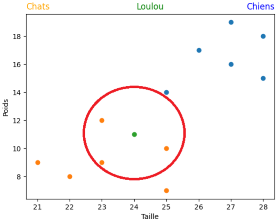

- La distance de Manhattan : $|x_1-x_2|+|x_1-y_2|$
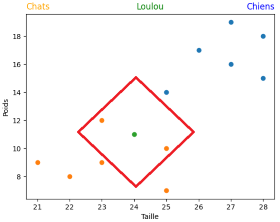

- La distance de Tchebychev : $max( |x_1-x_2|,|x_1-y_2| )$
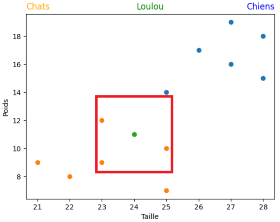


## Choix du nombre $k$

L'exemple ci dessous montre que le choix du nombre $k$ est déterminant et peut donner des résultats différents :
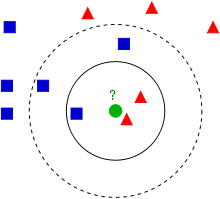


- Si $k=3$ la cible sera classée dans les triangles rouges  
- Si $k=5$ la cible sera classée dans les carrés bleus


## L'algorithme

Si on veut déterminer la classe d'une donnée `cible` en fonction des données d'une table `liste` à l'aide des $k$ plus proches voisins, l'algorithme est le suivant :

1. On détermine une règle de calcul de la distance.
2. On calcule la distance de chacun des objets de la table `liste` à la donnée `cible`.
3. On trie les éléments de la table `liste` selon cette distance croissante.
4. On extrait les $k$ premiers éléments de cette table.
4. On détermine la classe majoritaire parmi ces $k$ éléments et on l'attribue à la donnée `cible`.

Reprenons notre exemple des chats et des chiens : 

1. Nous utiliserons la distance euclidienne $(\sqrt{(x_1-x_2)^2+(x_1-y_2)^2})$

2. Calculons les distances des éléments à `Loulou` (24cm, 11kg) :

| Nom | Catégorie | Taille | Poids | **Distance** |
|:-----|-----------|--------|-------|----------|
| Médor     | Chien | 27 | 19 | **8.5** |
| Rex       | Chien | 28 | 18 | **8.1** |
| Lassie    | Chien | 28 | 15 | **5.7** |
| Snoopy    | Chien | 26 | 17 | **6.3** |
| Laïka     | Chien | 25 | 14 | **3.2** |
| Milou     | Chien | 27 | 16 | **5.8** |
| Félix     | Chat  | 25 | 10 | **1.4** |
| Sylvestre | Chat  | 23 | 12 | **1.4** |
| Tigrou    | Chat  | 23 | 9  | **2.2** |
| Chipie    | Chat  | 22 | 8  | **3.6** |
| Minou     | Chat  | 21 | 10 | **3.6** |
| Mimi      | Chat  | 25 | 8  | **4.1** |

3. Trions maintenant les éléments selon les distances croissantes :

|N| Nom | Catégorie | Taille | Poids | Distance |
|-|:-----|-----------|--------|-------|----------|
|**1**| Félix     | Chat  | 25 | 10 | 1.4 |
|**2**| Sylvestre | Chat  | 23 | 12 | 1.4 |
|**3**| Tigrou    | Chat  | 23 | 9  | 2.2 |
|**4**| Laïka     | Chien | 25 | 14 | 3.2 |
|**5**| Chipie    | Chat  | 22 | 8  | 3.6 |
|**6**| Minou     | Chat  | 21 | 10 | 3.6 |
|**7**| Mimi      | Chat  | 25 | 8  | 4.1 |
|**8**| Lassie    | Chien | 28 | 15 | 5.7 |
|**9**| Milou     | Chien | 27 | 16 | 5.8 |
|**10**| Snoopy    | Chien | 26 | 17 | 6.3 |
|**11**| Rex       | Chien | 28 | 18 | 8.1 |
|**12**| Médor     | Chien | 27 | 19 | 8.5 |

4. Extrayons les $4$ plus proches voisins :

|N| Nom | Catégorie | Taille | Poids | Distance |
|-|:-----|-----------|--------|-------|----------|
|1| Félix     | **Chat**  | 25 | 10 | 1.4 |
|2| Sylvestre | **Chat**  | 23 | 12 | 1.4 |
|3| Tigrou    | **Chat**  | 23 | 9  | 2.2 |
|4| Laïka     | Chien | 25 | 14 | 3.2 |

5. La catégorie majoritaire est `chat` avec **3** instances sur 4 
